importing Jupyter notebook from total.ipynb


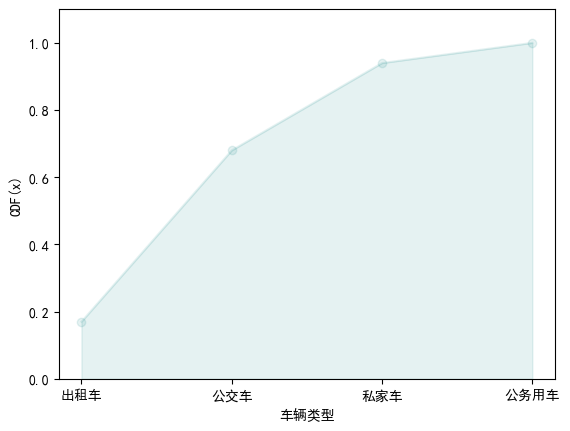

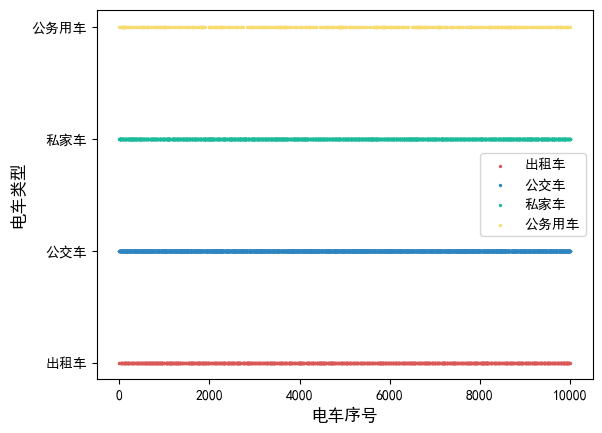

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate
import pylab as pl
import random
import importer
from total import Tag,count,type_list,Inverse_Transform_Sampling

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号

  ## 1. 电车充电开始时刻的概率模型参数：
- us_cst：代表电车充电开始时间的期望
- ds_cst:：代表电车充电开始时间的标准差
- Taxi与Bus服从双峰正态分布，private car服从三峰正态分布，public car服从单峰正态分布
- CDF_cst_list为存储各电车充电开始时刻概率分布函数值的列表

In [2]:
us_cst_list=np.array([[0,3.5,13],[0,13,23],[9.5,14,19],[0,0,19]], dtype=float)
ds_cst_list=np.array([[0,1,1],[0,1,1],[1,1,2],[0,0,2]], dtype=float)
weight_cst_list=np.array([[0,0.6,0.4],[0,0.5,0.5],[0.2,0.1,0.7],[0,0,1]], dtype=float)

In [3]:
pdf_cst_list=np.zeros((4, 25), dtype=float)
def normal3(us_cst,ds_cst,weight_cst,pdf_cst):#triple_peak_norm
    for i in range(0,25):
        tmp_cst=0
        for j in range(0,2):
            if weight_cst[j] != 0:
                    tmp_cst += weight_cst[j] * (1 / (ds_cst[j] * math.sqrt(2*math.pi)) * math.e ** (-(i - us_cst[j])**2 / (2 * ds_cst[j]**2)))
        if i<us_cst[2]-18:
                tmp_cst+=weight_cst[2]*(1/(ds_cst[2]* math.sqrt(2*math.pi)) * math.e**( -(i +24 - us_cst[2])**2/ (2*ds_cst[2]**2)  ))
        else:
                tmp_cst+=weight_cst[2]*(1/(ds_cst[2]* math.sqrt(2*math.pi)) * math.e**( -(i - us_cst[2])**2/ (2*ds_cst[2]**2)  ))
        pdf_cst[i]=np.sum(tmp_cst)

for i in range(0,4):
    normal3(us_cst_list[i],ds_cst_list[i],weight_cst_list[i],pdf_cst_list[i])
    pdf_cst_list[i]/=sum(pdf_cst_list[i])


pdf_cst_list[0],pdf_cst_list[2]


(array([5.23614673e-04, 1.05170819e-02, 7.77113078e-02, 2.11241236e-01,
        2.11241236e-01, 7.77113078e-02, 1.05170819e-02, 5.23617103e-04,
        1.01850308e-05, 5.35972264e-05, 1.77275664e-03, 2.15965951e-02,
        9.67892244e-02, 1.59578453e-01, 9.67892244e-02, 2.15965951e-02,
        1.77275648e-03, 5.35326072e-05, 5.94693548e-07, 2.43037661e-09,
        3.65392345e-12, 2.02092795e-15, 4.11194913e-19, 3.07786917e-23,
        8.47535885e-28]),
 array([6.10909228e-03, 1.66220299e-17, 4.85100219e-14, 5.31682475e-11,
        2.14489764e-08, 3.18330094e-06, 1.73802262e-04, 3.49091199e-03,
        2.57945670e-02, 7.01174654e-02, 7.01356967e-02, 2.62824925e-02,
        9.17144338e-03, 2.58136848e-02, 4.58386468e-02, 4.29126126e-02,
        5.05168053e-02, 8.47747377e-02, 1.22717725e-01, 1.39042447e-01,
        1.22704399e-01, 8.43334176e-02, 4.51404256e-02, 1.88173290e-02,
        6.10909228e-03]))

In [4]:
CDF_cst_list=np.zeros((4, 25), dtype=float)
for i in range(0,4):
    CDF_cst_list[i][0]=pdf_cst_list[i][0]
    for j in range(1,25):
        CDF_cst_list[i][j]=CDF_cst_list[i][j-1]+pdf_cst_list[i][j]

CDF_cst_list[3][0:10]

array([0.00871157, 0.00871157, 0.00871157, 0.00871157, 0.00871157,
       0.00871157, 0.00871157, 0.00871157, 0.00871162, 0.00871236])

  ## 2. 电车充电开始时刻的概率模型绘图：

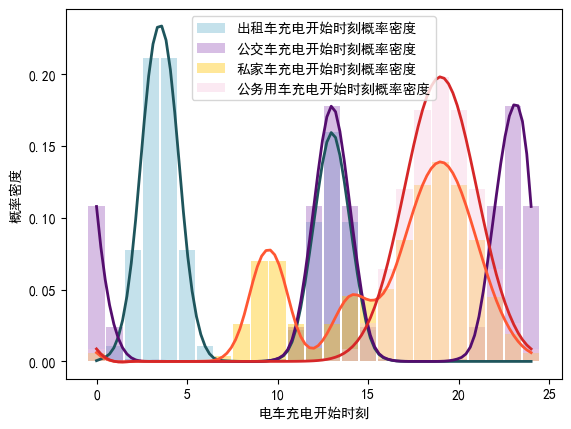

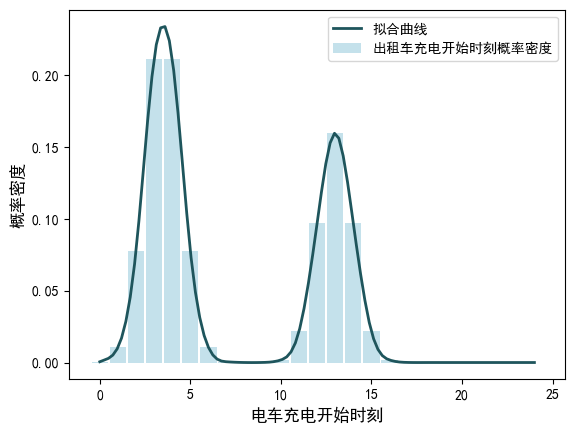

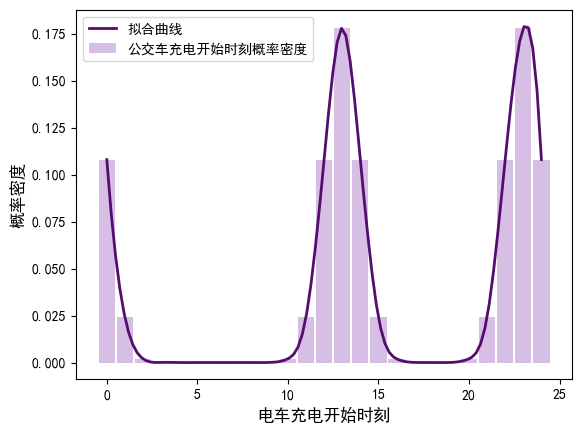

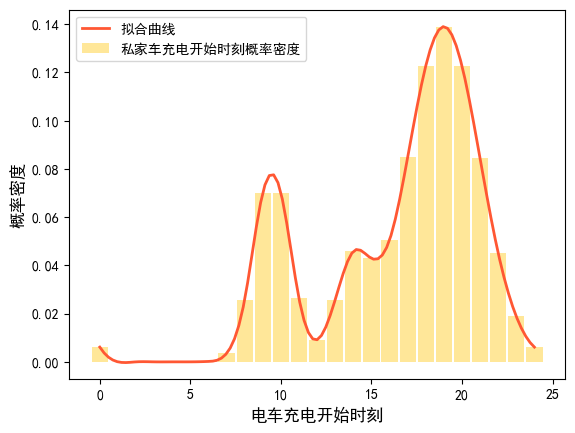

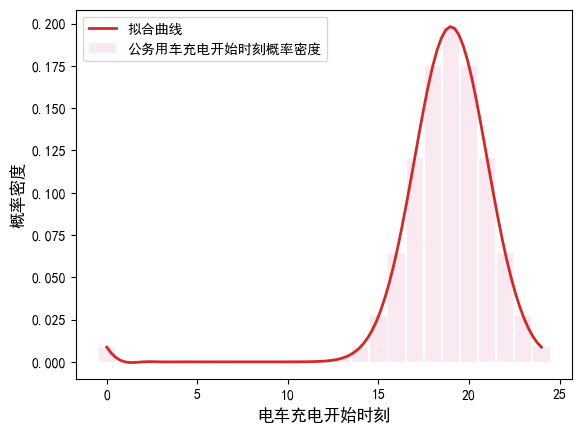

In [5]:
color=['#6CB4CE','#9B5DBC','#FFC300','#F7C8E0']
line_color=['#1E555C','#540D6E','#FF5733','#d62728']

#合在一起显示
for i in range(0,4):
    x=range(0,25)
    y=np.array(pdf_cst_list[i])
    plt.bar(x,y,color=color[i],width=0.9, alpha=0.4,label="{}充电开始时刻概率密度".format(Tag[i]))

    #进行插值拟合
    xnew=np.linspace(0,24,101)
    f=interpolate.interp1d(x,y,'cubic')#3阶插值
    ynew=f(xnew)
    plt.plot(xnew,ynew,color=line_color[i],linewidth=2, alpha=1)

    plt.xlabel("电车充电开始时刻")
    plt.ylabel("概率密度")
    plt.legend()
plt.show()

#分开显示
for i in range(0,4):
    x=range(0,25)
    y=np.array(pdf_cst_list[i])
    plt.bar(x,y,color=color[i],width=0.9, alpha=0.4,label="{}充电开始时刻概率密度".format(Tag[i]))

    #进行插值拟合
    xnew=np.linspace(0,24,101)
    f=interpolate.interp1d(x,y,'cubic')#3阶插值
    ynew=f(xnew)
    plt.plot(xnew,ynew,color=line_color[i],linewidth=2, alpha=1, label="拟合曲线")

    plt.xlabel("电车充电开始时刻", fontsize=12)
    plt.ylabel("概率密度", fontsize=12)
    plt.legend(prop={'size': 10})
    plt.show()



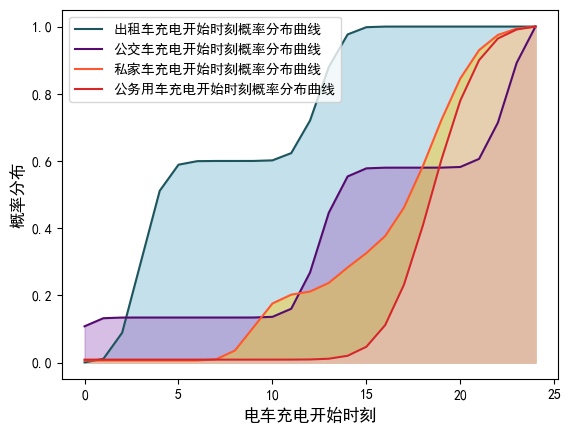

In [6]:
for i in range(0,4):
    plt.xlabel("电车充电开始时刻", fontsize=12)
    plt.ylabel("概率分布", fontsize=12)
    plt.plot(CDF_cst_list[i],color=line_color[i],label="{}充电开始时刻概率分布曲线".format(Tag[i]))
    plt.fill_between(x, CDF_cst_list[i], color=color[i], alpha=0.4)
    plt.legend(prop={'size': 10})   
plt.show()